<a href="https://colab.research.google.com/github/jobint001/Basic_python_for_machine_learning/blob/main/catdog_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Model for detecting cat and dog

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
  
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg

In [ ]:
from google.colab import drive
drive.mount('/content/my-drive/')

Mounted at /content/my-drive/


In [ ]:
path = '/content/my-drive/MyDrive/Train_Data'
classes = os.listdir(path)
classes

In [5]:
base_dir = '/content/my-drive/MyDrive/Train_Data'
  
# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  subset='training',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  subset='validation',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)

Found 1399 files belonging to 2 classes.
Using 1260 files for training.
Found 1399 files belonging to 2 classes.
Using 139 files for validation.


In [6]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
  
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [7]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
history = model.fit(train_datagen,
          epochs=3,
          validation_data=test_datagen)

Epoch 1/3
40/40 [==============================] - 275s 6s/step - loss: 0.7813 - accuracy: 0.5587 - val_loss: 1.4310 - val_accuracy: 0.5540
Epoch 2/3
40/40 [==============================] - 94s 2s/step - loss: 0.6489 - accuracy: 0.6460 - val_loss: 0.6984 - val_accuracy: 0.5540
Epoch 3/3
40/40 [==============================] - 90s 2s/step - loss: 0.6152 - accuracy: 0.6770 - val_loss: 0.5996 - val_accuracy: 0.6331


In [7]:
keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

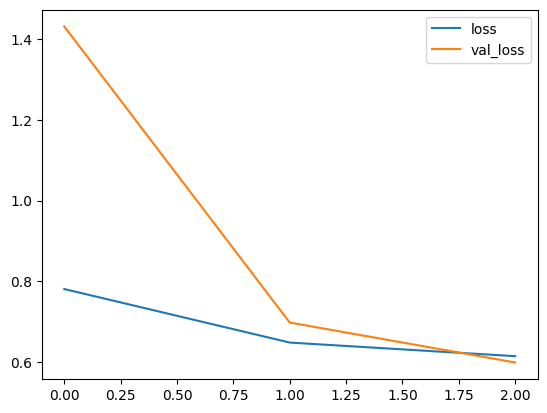

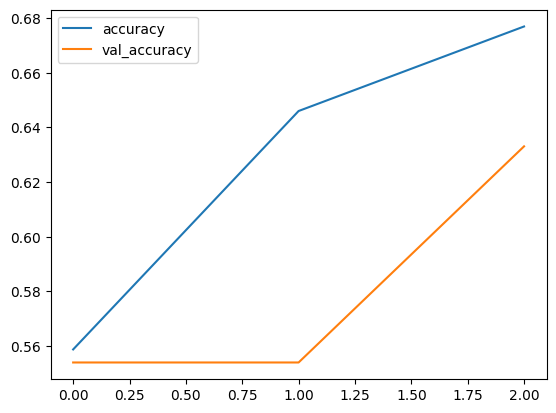

1/1 [==============================] - 0s 42ms/step
[[0.6028589]]
Dog


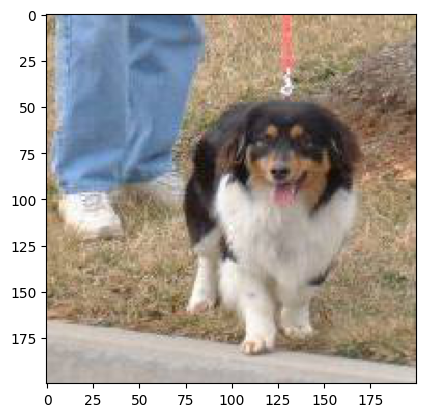

In [9]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()
from keras.preprocessing import image

  
#Input image
test_image = tf.keras.utils.load_img('/content/my-drive/MyDrive/Train_Data/dog/dog.2.jpg',target_size=(200,200))
  
#For show image
plt.imshow(test_image)
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
  
# Result array
result = model.predict(test_image)
print(result)
#Mapping result array with the main name list
i=0
if(result>=0.5):
  print("Dog")
else:
  print("Cat")